In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Markov Chain Monte Carlo Example

Let's explore MCMC using the Hastings-Metropolis algorithms.  We will define a PDF function that we want to sample.  Let's start with a Gaussian and try to resolve the mean and standard deviation from the MCMC data we obtain.  We can vary the starting point of the chain (seed) and the number of trials to assess the value of this method.

Let's first define our functions, which we'll need below:
1) The underlying PDF function: gaussian with mean=10 and std dev = 5
2) Our proposal function: gaussian with mean given by previous point and std dev = 20
3) Acceptance function

In [33]:
# define our underlying PDF to sample
# this is the true PDF!
def pdfFunc(xvar, doPrint):
    mean = 10
    stddev = 5
    retval = 1/np.sqrt(2*math.pi)
    retval *= math.exp(-1*math.pow(xvar-mean,2)/(2*math.pow(stddev,2)))
    if doPrint == True:
        print("pdf value: ", retval)
    return retval        

# define our proposal function
# this is the moving function trying to find the real mean value
def propFunc(xvar):
    stddev = 20
    return np.random.normal(xvar,stddev)

# define our acceptance function
def acceptPoint(previous, doPrint):
    # Draw a new proposed value based on our last point
    propo = propFunc(previous)

    # Check to see if our new point improves or not
    # If the new point has a smaller value of the function than the old point,
    # then it gets a lower probability of being accepted
    threshold = np.minimum(1,pdfFunc(propo,doPrint)/(pdfFunc(previous,doPrint)+1e-9))

    # random trial, uniform in [0,1)
    rand = np.random.uniform(0,1)

    # report for interested parties
    if doPrint == True:
        print("input x: ", previous)
        print("proposal x: ", propo)
        print("threshold: ", threshold)
        print("rand: ", rand)

    # Check to see if our random number is below the threshold
    # If it is (ie, we've moved to higher function value), then accept.
    # If not, reject
    if rand < threshold:
        if doPrint == True:
            print("Accept new point")
        return propo
    else:
        if doPrint == True:
            print("Reject new point")
        return previous
        

In [34]:
# arrays to store our data in
seq1 = []
seq2 = []

# random guesses for the true value of the PDF mean
seed1 = 60
seed2 = 10

# accept the first seed for each MCMC chain
x1 = seed1
seq1.append([0,x1])
x2 = seed2
seq2.append([0,x2])

doPrint = True # Do you want to listen to printouts??
nTrials = 100 # this line sets the number of MCMC trials

print("starting our sequence....")
for i in range(1,nTrials):    
    if doPrint:
        print("\nSeed 1:")
    x1 = acceptPoint(x1, doPrint)    
    seq1.append([i,x1])

    if doPrint:
        print("\nSeed 2:")
    x2 = acceptPoint(x2, doPrint)
    seq2.append([i,x2])

starting our sequence....

Seed 1:
pdf value:  0.03984299772107926
pdf value:  7.69459862670642e-23
input x:  60
proposal x:  20.732823654306358
threshold:  1.0
rand:  0.22205787621124629
Accept new point

Seed 2:
pdf value:  0.00020427199180957702
pdf value:  0.3989422804014327
input x:  10
proposal x:  29.464223110334096
threshold:  0.000512033949101599
rand:  0.6590530938522022
Reject new point

Seed 1:
pdf value:  0.281344066615175
pdf value:  0.03984299772107926
input x:  20.732823654306358
proposal x:  14.178746158249059
threshold:  1.0
rand:  0.44413306077778825
Accept new point

Seed 2:
pdf value:  0.0017257712102357829
pdf value:  0.3989422804014327
input x:  10
proposal x:  26.497185694545532
threshold:  0.0043258669002778334
rand:  0.3051510376470865
Reject new point

Seed 1:
pdf value:  4.696025640111547e-05
pdf value:  0.281344066615175
input x:  14.178746158249059
proposal x:  31.26883916586068
threshold:  0.0001669139740502655
rand:  0.8434502153452557
Reject new point



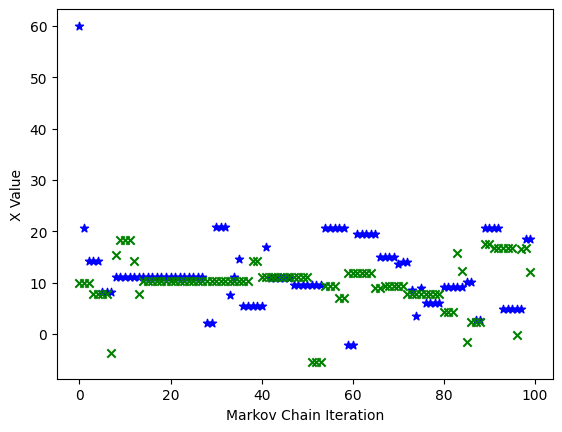

In [35]:
x1, y1 = zip(*seq1)
x2, y2 = zip(*seq2)

plt.scatter(x1,y1,marker="*",color="b")
plt.scatter(x2,y2,marker="x",color="g")
plt.ylabel('X Value')
plt.xlabel('Markov Chain Iteration');
plt.show()

Best fit 1:  11.955825086843497 7.348390731323772


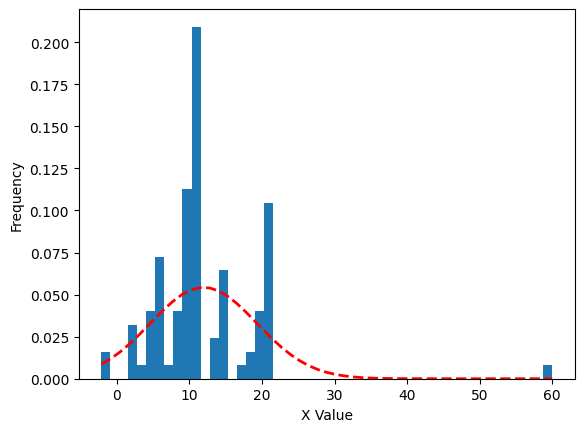

In [36]:
(mu, sigma) = norm.fit(y1)
print("Best fit 1: ", mu,sigma)
n, bins, patches = plt.hist(y1,density="true",bins=50)
yy = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, yy, 'r--', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('X Value');
plt.show()

Best fit 2:  9.818456542192575 4.802644282248968


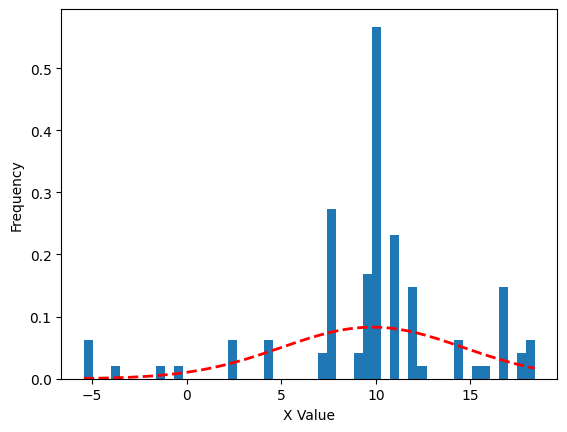

In [37]:
(mu, sigma) = norm.fit(y2)
print("Best fit 2: ", mu,sigma)

n, bins, patches = plt.hist(y2,density="true",bins=50)
# add a 'best fit' line
yy = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, yy, 'r--', linewidth=2)
plt.ylabel('Frequency')
plt.xlabel('X Value');
plt.show()